2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

     Accuracy: 
    Scenario: How well a medical diagnostic test performs overall, such as identifying a patient's illness. 
    Rationale: By combining accurate positive and negative predictions, accuracy provides a broad idea of how frequently the test is accurate. When the costs of false positives and false negatives are roughly equal, it can be helpful.
    
    Sensitivity:

    Scenario: Tests for cancer screening, such as those used to identify breast cancer.
    Rationale: Sensitivity aims to minimize false negatives while detecting as many true positives as possible. This is crucial in situations like missed cancer diagnoses, where failing to detect a positive case might have serious repercussions.

    Specifications:

    Scenario: Identification of banking transaction fraud.
    Rationale: A system's specificity indicates how successfully it prevents false alarms, also known as false positives. Low false positives in fraud detection make sure that valid transactions aren't mistakenly banned or marked.

    Presicion:

    Scenario: Identification of spam emails.
    Rationale: By ensuring that reported emails are actually spam, Precision lowers the possibility of classifying crucial communications as spam. To prevent user annoyance from incorrectly classified emails, high precision is crucial.

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

    Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

Number of observations in the training set: 4
Number of observations in the testing set: 1


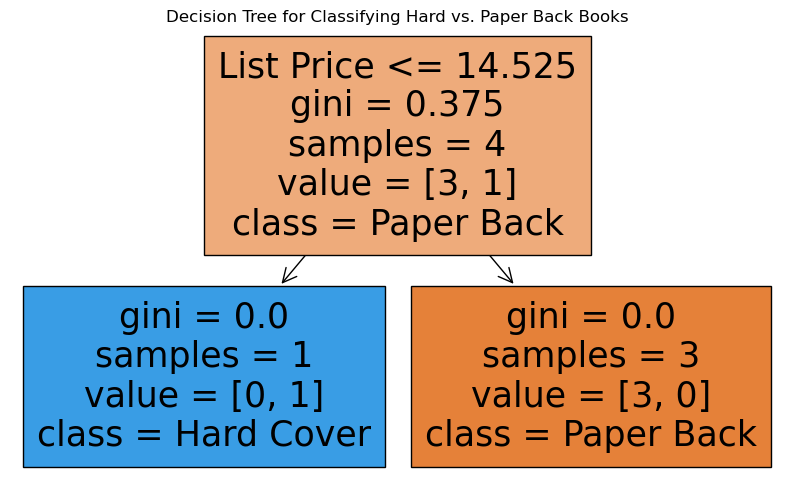

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# If your dataset is not available, use dummy data for testing
data = {
    'Hard_or_Paper': ['Hard', 'Paper', 'Hard', 'Paper', 'Hard'],
    'List Price': [20.99, 15.49, 22.50, 10.75, 18.30]
}
ab_reduced_noNaN = pd.DataFrame(data)

# Preparing the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"], drop_first=True)  # 'H' assumed to be second category
X = ab_reduced_noNaN[['List Price']]

# Splitting the data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reporting observations
print(f"Number of observations in the training set: {X_train.shape[0]}")
print(f"Number of observations in the testing set: {X_test.shape[0]}")

# Training the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'], filled=True)
plt.title("Decision Tree for Classifying Hard vs. Paper Back Books")
plt.show()


6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [4]:
# Adjust the test size for a larger test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Train clf2
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Predictions
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Metrics Calculations (as before)
TN_clf, FP_clf, FN_clf, TP_clf = conf_matrix_clf.ravel()
specificity_clf = TN_clf / (TN_clf + FP_clf) if (TN_clf + FP_clf) != 0 else 0
sensitivity_clf = TP_clf / (TP_clf + FN_clf) if (TP_clf + FN_clf) != 0 else 0
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

TN_clf2, FP_clf2, FN_clf2, TP_clf2 = conf_matrix_clf2.ravel()
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2) if (TN_clf2 + FP_clf2) != 0 else 0
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2) if (TP_clf2 + FN_clf2) != 0 else 0
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Report Metrics
print("Model clf:")
print(f"Confusion Matrix:\n{conf_matrix_clf}")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

print("\nModel clf2:")
print(f"Confusion Matrix:\n{conf_matrix_clf2}")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")


Model clf:
Confusion Matrix:
[[2 0]
 [1 0]]
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.667

Model clf2:
Confusion Matrix:
[[2 0]
 [0 1]]
Sensitivity: 1.0
Specificity: 1.0
Accuracy: 1.0


7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

    First Model:

    Uses only the "List Price" feature to predict the outcome variable.

    Second Model:

    Incorporates multiple features (NumPages, Thick, and List Price) to predict the outcome variable.

    Why Confusion Matrices for clf and clf2 Are Better:

    The confusion matrices for clf and clf2 are generated using a test set . Evaluating performance on unseen data provides a better measure of how well the models generalize to new inputs, making them more reliable for comparison and interpretation.